In [1]:
from pathlib import Path
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastai.tabular.all as fai_tab
import fastai.collab as fai_collab
import torch
from torch.utils.data import Dataset, DataLoader

pd.options.display.max_columns = 0

In [2]:
path = fai_tab.untar_data(fai_tab.URLs.ML_100k)

In [3]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user', 'movie', 'rating', 'timestamp'])
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [56]:
t = pd.DataFrame(ratings.user.unique(), columns=['user'])
t.head()

,user
0,196
1,63
2,226
3,154
4,306


In [58]:
t.loc[t.user == 154].index.values[0]

3

In [65]:
ratings.tail()

,user,movie,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1994)"
99999,655,1641,3,887427810,Dadetown (1995)


In [67]:
idx = 99998
t.loc[t.user == ratings.iloc[idx]['user']].index.values[0]
# ratings.iloc[idx]

88

In [68]:
t.iloc[88]

user    655
Name: 88, dtype: int64

In [70]:
unique_users = ratings.user.unique()
unique_users

array([196,  63, 226, 154, 306, 296,  34, 271, 201, 209,  35, 354, 199,
       113,   1, 173, 360, 234,  14, 309, 331,  21, 111, 439, 355, 204,
       145,  30, 463, 144, 417,   2, 497, 523,  12, 202, 131, 451, 532,
       539, 537, 416, 566, 597, 181, 639, 123, 520, 617,  86, 624,   9,
       651, 492, 207, 460, 697, 129,  40, 740, 239, 794, 461, 771, 733,
       568, 673, 249,   6, 205, 592, 440, 641, 765, 139, 628, 473, 695,
       206, 863,  90, 594, 866, 803, 240, 753, 735, 869, 655,  18, 898,
       937, 767, 533, 680, 485, 574, 758, 486,  13, 724, 270, 428, 861,
       871, 408, 195, 279, 743, 707, 894, 675, 305, 845, 500, 720, 721,
       186, 191,  49,  54,  62, 197, 214, 190, 303,  31, 178, 102, 100,
       315,  88, 282, 334, 208, 112, 277, 392, 276, 126, 319,  47, 146,
       378, 171, 192, 345, 107, 222, 433, 229, 339, 427,  29, 420,  43,
       268, 241, 397, 383, 346, 418, 405, 179, 362,  10, 297, 425, 413,
       149, 430, 232, 104, 285,  26, 514,  15, 293, 489, 421, 34

In [74]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
np.expand_dims(np.array(unique_users), axis=1)

array([[196],
       [ 63],
       [226],
       [154],
       [306],
       [296],
       [ 34],
       [271],
       [201],
       [209],
       [ 35],
       [354],
       [199],
       [113],
       [  1],
       [173],
       [360],
       [234],
       [ 14],
       [309],
       [331],
       [ 21],
       [111],
       [439],
       [355],
       [204],
       [145],
       [ 30],
       [463],
       [144],
       [417],
       [  2],
       [497],
       [523],
       [ 12],
       [202],
       [131],
       [451],
       [532],
       [539],
       [537],
       [416],
       [566],
       [597],
       [181],
       [639],
       [123],
       [520],
       [617],
       [ 86],
       [624],
       [  9],
       [651],
       [492],
       [207],
       [460],
       [697],
       [129],
       [ 40],
       [740],
       [239],
       [794],
       [461],
       [771],
       [733],
       [568],
       [673],
       [249],
       [  6],
       [205],
       [592],
      

In [85]:
t = pd.DataFrame(np.arange(len(unique_users)), index=unique_users)
# t.loc[598] # -> 941
t.tail()

,0
799,938
358,939
410,940
598,941
873,942


In [87]:
t.to_dict()[0]

{196: 0,
 63: 1,
 226: 2,
 154: 3,
 306: 4,
 296: 5,
 34: 6,
 271: 7,
 201: 8,
 209: 9,
 35: 10,
 354: 11,
 199: 12,
 113: 13,
 1: 14,
 173: 15,
 360: 16,
 234: 17,
 14: 18,
 309: 19,
 331: 20,
 21: 21,
 111: 22,
 439: 23,
 355: 24,
 204: 25,
 145: 26,
 30: 27,
 463: 28,
 144: 29,
 417: 30,
 2: 31,
 497: 32,
 523: 33,
 12: 34,
 202: 35,
 131: 36,
 451: 37,
 532: 38,
 539: 39,
 537: 40,
 416: 41,
 566: 42,
 597: 43,
 181: 44,
 639: 45,
 123: 46,
 520: 47,
 617: 48,
 86: 49,
 624: 50,
 9: 51,
 651: 52,
 492: 53,
 207: 54,
 460: 55,
 697: 56,
 129: 57,
 40: 58,
 740: 59,
 239: 60,
 794: 61,
 461: 62,
 771: 63,
 733: 64,
 568: 65,
 673: 66,
 249: 67,
 6: 68,
 205: 69,
 592: 70,
 440: 71,
 641: 72,
 765: 73,
 139: 74,
 628: 75,
 473: 76,
 695: 77,
 206: 78,
 863: 79,
 90: 80,
 594: 81,
 866: 82,
 803: 83,
 240: 84,
 753: 85,
 735: 86,
 869: 87,
 655: 88,
 18: 89,
 898: 90,
 937: 91,
 767: 92,
 533: 93,
 680: 94,
 485: 95,
 574: 96,
 758: 97,
 486: 98,
 13: 99,
 724: 100,
 270: 101,
 428: 10

In [8]:
class MoviesDataset(Dataset):
    def __init__(self, df: pd.DataFrame, label_col: str):
        self.label_col = label_col
        self.df = df.copy()

        self.df_X = torch.from_numpy(self.df.copy()[['user', 'movie']].values)

        self.unique_users = ratings.user.unique()
        self.user_to_idx = pd.DataFrame(
            np.arange(len(self.unique_users)), index=self.unique_users
        ).to_dict()[0]

        self.unique_movies = ratings.movie.unique()
        self.movie_to_idx = pd.DataFrame(
            np.arange(len(self.unique_movies)), index=self.unique_movies
        ).to_dict()[0]

        
        # self.user_idxs = pd.DataFrame(ratings.user.unique(), columns=['user'])
        # self.movie_idxs = pd.DataFrame(ratings.movie.unique(), columns=['movie'])

        self.df['user_idx'] = self.df.user #.replace(self.user_to_idx)
        self.df['movie_idx'] = self.df.movie #.replace(self.movie_to_idx)
        self.df = self.df.replace({
            'user_idx': self.user_to_idx,
            'movie_idx': self.movie_to_idx
        })

        self.df_X = torch.from_numpy(
            self.df.copy()[['user_idx', 'movie_idx']].values
        )
        self.df_y = torch.from_numpy(
            self.df.copy()[label_col].values
        )

    def __len__(self):
        return len(self.df)
    
    # Here the dataloader will pass us an index in the dataframe
    # We need to transform the values (userid,movieid) 
    # to indices of the userid,movieid within their embedding matrix
    def __getitem__(self, idx):
        return self.df_X[idx], self.df_y[idx]

In [9]:
train_split, val_split = fai_tab.RandomSplitter(seed=42)(ratings)
train_split, val_split

((#80000) [1509,83391,62311,57794,73100,18267,86107,55175,29914,88278...],
 (#20000) [37542,60279,68544,70051,15790,14785,72904,31383,48566,9472...])

In [41]:
train_dl = DataLoader(
    MoviesDataset(ratings.iloc[train_split, :], 'rating'),
    batch_size=256,
    shuffle=True
)
val_dl = DataLoader(
    MoviesDataset(ratings.iloc[val_split, :], 'rating'),
    batch_size=256,
    shuffle=True
)
dl = DataLoader(
    MoviesDataset(ratings, 'rating'),
    batch_size=256,
    shuffle=True
)

In [42]:
next(iter(dl))

[tensor([[ 387,    3],
         [ 590, 1320],
         [ 596,  476],
         [ 810,  904],
         [ 483,   24],
         [  26,  484],
         [ 358,  560],
         [ 110,   30],
         [ 387,  239],
         [ 280, 1248],
         [ 390,  794],
         [ 814,  196],
         [ 714,  165],
         [ 315,  250],
         [ 606,  184],
         [  70,  391],
         [ 365,  124],
         [  30,  307],
         [ 889,  668],
         [ 595,  219],
         [ 694,  175],
         [ 208,  198],
         [ 397,  709],
         [  54,  623],
         [ 381,  944],
         [ 942,  289],
         [ 574,   32],
         [ 629,  613],
         [ 367,   62],
         [ 221,  158],
         [ 472,   32],
         [ 341,  211],
         [ 201,  783],
         [ 447,  231],
         [ 805,   88],
         [ 512,  258],
         [ 563,  308],
         [ 533,   92],
         [ 588, 1036],
         [ 120,  165],
         [  97,  822],
         [ 138,   18],
         [ 629, 1015],
         [ 

In [27]:
len(ratings.user.unique())

943

## Embedding matrix

The first thing we need to do for a collaborative filtering model is create embeddings for each unique user and item.

`torch.nn.Embedding` creates this embedding matrix. This basically generates a random numbers vector of the size of the embedding requested, in this cast 50. There are `num_unique_users` legnth of these vectors, which constitutes the embedding matrix for the users.

We can now index into this embedding matrix with either an individual row index or a list of row indices.

In [33]:
test_embed = torch.nn.Embedding(len(ratings.user.unique()), 50)
test_embed(torch.tensor([0,1]))

tensor([[-0.0344,  1.2887, -0.0351,  0.6937,  0.3784,  1.0414,  1.6568, -0.8968,
         -0.1932, -0.1101, -0.5174, -0.7921,  0.3977,  1.3628,  0.2947, -0.4013,
          0.6861, -1.2761,  0.6000, -1.2861, -1.3634, -0.1134, -0.7347, -0.3453,
          0.5304,  1.2526,  1.6723, -0.5369,  0.5877,  1.5883,  1.1315, -1.8747,
          1.0521,  1.9892, -0.7001,  0.5691,  0.7827, -0.8176, -0.1559, -0.4463,
          2.6620, -1.3013,  0.1851,  0.1551,  1.5841, -1.5591,  0.8985, -0.8684,
          1.0111, -0.2242],
        [ 0.0327, -2.2922, -1.8374, -0.3531,  0.3512,  0.0526,  0.0700,  1.0112,
          0.6919, -0.9461,  2.3710,  0.0437,  0.4526,  0.4653,  0.3946, -1.2431,
         -2.4938, -1.2130,  0.8998,  1.0261, -1.5574,  1.3656, -0.4743,  2.1647,
          1.3289, -1.2838,  1.2234,  0.0928,  1.0923,  0.2778, -0.5377,  0.2457,
         -1.4488,  0.9941, -1.1813,  0.7197, -0.2290,  0.9731,  0.6858, -0.2525,
          1.2990,  0.3994,  0.1976, -1.9028, -0.6103, -0.5849,  0.3088, -0.2225,


## Difficulty with hyperparams

After struggling a good bit to get this to learn to anything better than an MSE loss of 10, I increased the learning rate by a factor of 10 to 0.1 and got the training loss down to 0.7 within 10-20 epochs.

If you're quite certain your code is right, it's probably the hyperparams that are causing it not to train. A difficult lesson...

Could not get it to train at all with sigmoid * 5.5

Could not figure out getting this to work with weight decay or one cycle lr.

Ultimately, it seems like my code is all correct and that tinkering with increasingly complex micro-optimizations of hyperparameters is all that is left to get to the quality of results fastai is able to get.

Final loss: 6.90
Final MAE: 1.90


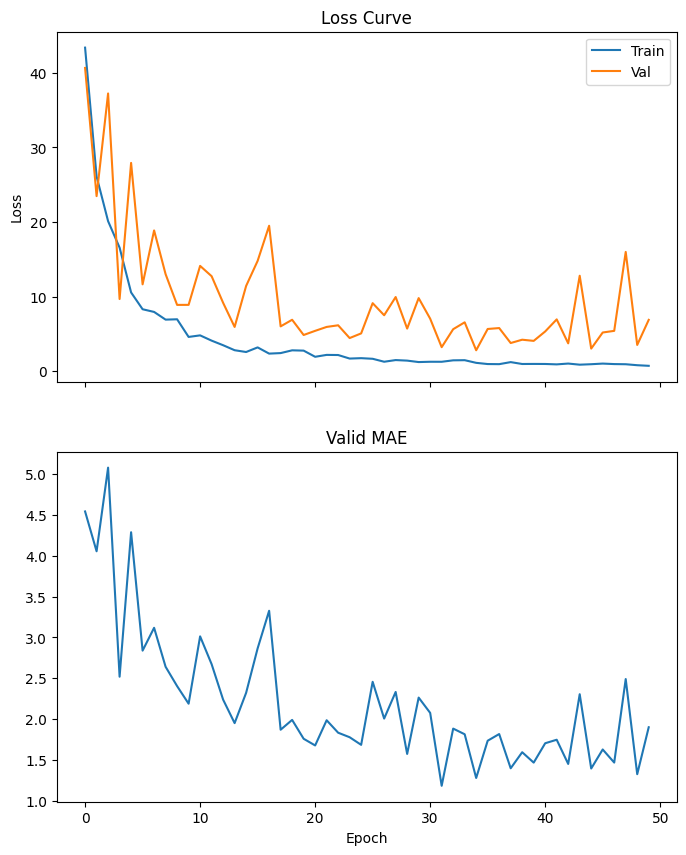

In [97]:
class DotProductModel(torch.nn.Module):
    def __init__(self, n_users: int, n_movies: int):
        super().__init__()
        self.user_embeds = torch.nn.Embedding(n_users, 50)
        self.user_biases = torch.nn.Embedding(n_users, 1)
        self.movie_embedes = torch.nn.Embedding(n_movies, 50)
        self.movie_biases = torch.nn.Embedding(n_movies, 1)

    def forward(self, x: torch.Tensor):
        user_embed = self.user_embeds(x[:, 0])
        user_bias = self.user_biases(x[:, 0])
        movie_embed = self.movie_embedes(x[:, 1])
        movie_bias = self.movie_biases(x[:, 1])
        
        return (user_embed*movie_embed).sum(axis=1, keepdim=True) + user_bias + movie_bias
        # return torch.nn.functional.sigmoid(
        #     (user_embed*movie_embed).sum(axis=1, keepdim=True) + user_bias + movie_bias
        # ) * 5.5
        # return (
        #     (user_embed+user_bias)*(movie_embed+movie_bias)
        # ).sum(axis=1)
        # return (user_embed*movie_embed).sum(axis=1)
        # return torch.nn.functional.sigmoid(
        #     (user_embed*movie_embed).sum(axis=1)
        # ) * 5.5


epochs = 50

model = DotProductModel(len(dl.dataset.unique_users), len(dl.dataset.unique_movies))

loss_fn = torch.nn.MSELoss()
# loss_fn = manual_loss
optim = torch.optim.SGD(model.parameters(), lr=0.1)
# optim = torch.optim.AdamW(model.parameters(), lr=0.01)

accs = []
losses_trn = []
losses_val = []
def train_loop(Xb: torch.Tensor, yb: torch.Tensor):
    preds = model(Xb)
    loss = loss_fn(preds.squeeze(), yb.float())
    # acc = ((preds > 0.5) == yb.unsqueeze(dim=1)).float().mean()
    acc = torch.nn.functional.l1_loss(preds.squeeze(), yb.float())

    loss.backward()
    optim.step()
    optim.zero_grad()

    return loss, acc

def valid_loop(Xb: torch.Tensor, yb: torch.Tensor):
    preds = model(Xb)
    loss = loss_fn(preds.squeeze(), yb.float())
    # acc = ((preds > 0.5) == yb.unsqueeze(dim=1)).float().mean()
    acc = torch.nn.functional.l1_loss(preds.squeeze(), yb.float())
    return loss, acc


for epoch in range(epochs):
    model.train()
    for Xb, yb in train_dl:
    # for Xb, yb in dl:
        loss, acc = train_loop(Xb, yb)
    
    losses_trn.append(loss.item())

    model.eval()
    with torch.inference_mode():
        for Xb, yb in val_dl:
            loss, acc = valid_loop(Xb, yb)
        
    losses_val.append(loss.item())
    accs.append(acc)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,10))
ax0.plot(losses_trn, label='Train')
ax0.plot(losses_val, label='Val')
ax0.legend()
ax0.set(
    title='Loss Curve',
    ylabel='Loss'
)

ax1.plot(accs)
ax1.set(
    title='Valid MAE',
    xlabel='Epoch'
);

print(f'Final loss: {loss.item():.2f}')
print(f'Final MAE: {acc.item():.2f}')

In [94]:
5e-3

0.005

In [63]:
losses_trn[-1]

0.7391718029975891

In [45]:
model.movie_biases.num_embeddings

1682

In [64]:
movie_biases_arr = model.movie_biases(
    torch.arange(model.movie_biases.num_embeddings)
).detach().numpy().squeeze()
movie_biases_arr

array([ 2.1305692 ,  2.640525  ,  0.24227063, ..., -0.8217679 ,
        2.096936  ,  0.97729814], dtype=float32)

In [65]:
movies_sorted_idxs = movie_biases_arr.argsort()
movies_sorted_idxs

array([ 439, 1541, 1355, ...,  357,  719,  993])

In [66]:
movies_sorted_idxs[-5:]

array([1514,  189,  357,  719,  993])

In [71]:
movie_biases_arr[439]

-2.951221

In [68]:
movie_biases_arr[movies_sorted_idxs[0]]

-2.951221

In [69]:
dl.dataset.unique_movies[movies_sorted_idxs[0]]

439

In [52]:
dl.dataset.unique_movies

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [53]:
dl.dataset.df

,user,movie,rating,timestamp,title,user_idx,movie_idx
0,196,242,3,881250949,Kolya (1996),0,0
1,63,242,3,875747190,Kolya (1996),1,0
2,226,242,5,883888671,Kolya (1996),2,0
3,154,242,3,879138235,Kolya (1996),3,0
4,306,242,5,876503793,Kolya (1996),4,0
...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),504,1677
99996,655,1640,3,888474646,"Eighth Day, The (1996)",88,1678
99997,655,1637,3,888984255,Girls Town (1996),88,1679
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1994)",88,1680


In [85]:
dl.dataset.df[
    dl.dataset.df['movie_idx'].isin(movies_sorted_idxs[-10:])
][['title','rating']].groupby('title').agg({
    'rating': ['count', np.average]
})

rating          
                                                  count   average
title                                                            
8 Seconds (1994)                                      4  3.750000
Anne Frank Remembered (1995)                         21  3.857143
Blood For Dracula (Andy Warhol's Dracula) (1974)      5  2.400000
Fargo (1996)                                        508  4.155512
Godfather, The (1972)                               413  4.283293
L.A. Confidential (1997)                            297  4.161616
Mondo (1996)                                          3  3.000000
Short Cuts (1993)                                    67  3.776119
Star Wars (1977)                                    583  4.358491
Titanic (1997)                                      350  4.245714

In [4]:
dls = fai_collab.CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,55,Independence Day (ID4) (1996),3
1,294,"Truth About Cats & Dogs, The (1996)",4
2,204,"Rainmaker, The (1997)",1
3,95,"Silence of the Lambs, The (1991)",4
4,606,"African Queen, The (1951)",4
5,923,Things to Do in Denver when You're Dead (1995),4
6,145,Pretty Woman (1990),2
7,805,Alien: Resurrection (1997),5
8,837,Antonia's Line (1995),4
9,648,That Darn Cat! (1997),3


In [137]:
class DotProductBias(torch.nn.Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors)
        self.user_bias = torch.nn.Embedding(n_users, 1)
        self.movie_factors = torch.nn.Embedding(n_movies, n_factors)
        self.movie_bias = torch.nn.Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users*movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return fai_collab.sigmoid_range(res, *self.y_range)
    
n_users  = len(dls.classes['user'])
n_movies = len(dls.classes['title'])

model_fai = DotProductBias(n_users, n_movies, 50)

In [138]:
learn = fai_collab.Learner(dls, model_fai, loss_func=fai_collab.MSELossFlat())

In [139]:
# Was able to get same valid loss results as Jeremy's notebook by doubling weight decay
# His valid loss started much lower (0.93), I guess just by chance?
learn.fit_one_cycle(15, 5e-3, wd=0.2)

epoch,train_loss,valid_loss,time
0,7.504385,7.265771,00:04
1,4.415151,4.335969,00:05
2,1.081898,1.084482,00:05
3,0.847121,0.895045,00:05
4,0.813248,0.867441,00:05
5,0.780027,0.859951,00:05
6,0.773866,0.852718,00:05
7,0.707925,0.843878,00:05
8,0.660669,0.834527,00:05
9,0.613246,0.828937,00:05


In [149]:
movie_bias_t = learn.model.movie_bias(
    torch.arange(learn.model.movie_bias.num_embeddings).to('cuda')
).cpu().detach().numpy().squeeze()
idxs = movie_bias_t.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Mortal Kombat: Annihilation (1997)',
 'Crow: City of Angels, The (1996)',
 'Cable Guy, The (1996)']

In [150]:
idxs = movie_bias_t.argsort()[-5:]
[dls.classes['title'][i] for i in idxs]

['Good Will Hunting (1997)',
 'Star Wars (1977)',
 "Schindler's List (1993)",
 'Shawshank Redemption, The (1994)',
 'Titanic (1997)']

In [152]:
movie_factors = learn.model.movie_factors.weight
idx = dls.classes['title'].o2i['Star Wars (1977)']
distances = torch.nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Empire Strikes Back, The (1980)'

## Deep Learning Version

All we need to change to get a deep learning version is to concatenate the embeddings and then feed them into a standard neural network, rather than doing the dot product of the embeddings.

This is about as effective as the dot product method.

A few of the benefits of this method include that you could use different embedding sizes for each of movies/users, and more importantly, it can be applied to any problem - not just collaborative learning.

In [184]:
class DeepLearningBias(torch.nn.Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors)
        self.movie_factors = torch.nn.Embedding(n_movies, n_factors)

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(n_factors + n_factors, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100,1)
        )

        self.y_range = y_range
        
    def forward(self, x):
        # Just like with my pytorch dataset/dataloader,
        # x is a batch of (user_embedding_idx, movie_embedding_idx)
        # So we look up the embedding for each in their own embedding matrix
        # by their index.
        # The reason fastai knows to pass the index here instead of 
        # the actual value (e.g. Titanic) is because we made CollabDataLoaders
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = self.layers(torch.cat((users, movies), dim=1))
        return fai_collab.sigmoid_range(res, *self.y_range)
    
model_deep_fai = DeepLearningBias(n_users, n_movies, 50)
learn = fai_collab.Learner(dls, model_deep_fai, loss_func=fai_collab.MSELossFlat())
learn.fit_one_cycle(10, 5e-3, wd=0.2)

epoch,train_loss,valid_loss,time
0,1.086482,1.056941,00:06
1,0.937937,0.946229,00:05
2,0.925746,0.913979,00:06
3,0.923173,0.903847,00:05
4,0.895304,0.887268,00:05
5,0.862411,0.883358,00:05
6,0.831024,0.842727,00:05
7,0.789619,0.837574,00:04
8,0.722616,0.825380,00:05
9,0.712537,0.826457,00:04
